In [1]:
from reader import *
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import os
from scipy import misc
import pickle

from cfgs.config import cfg

plt.rcParams['figure.figsize'] = [10, 10]

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
dp_list = []
ds = Data('train', False, debug=True)
print(ds.size())

loading annotations into memory...
Done (t=6.54s)
creating index...
index created!
8


In [3]:
ds.reset_state()
g = ds.get_data()
for _ in range(ds.size()):
    dp_list.append(next(g))

In [4]:
dp = dp_list[4]
img, heatmap, paf, mask = dp
img = img.astype(np.uint8)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask_shown = cv2.resize(mask, (368, 368), interpolation=cv2.INTER_CUBIC)

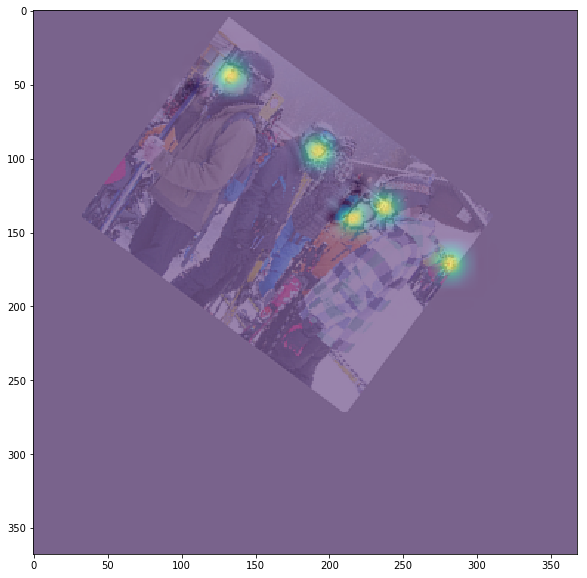

In [5]:
heatmap_shown = cv2.resize(heatmap[:, :, 0], (368, 368), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)
plt.imshow(mask_shown, cmap='gray', alpha=0.5)
plt.imshow(heatmap_shown, alpha=0.5)

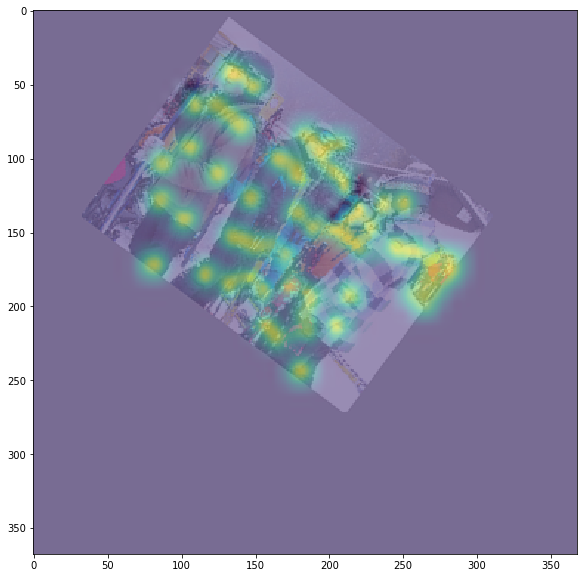

In [6]:
all_heatmap_shown = cv2.resize(np.amax(heatmap[:,:, 0:18], axis=2), (368, 368), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)
plt.imshow(mask_shown, cmap='gray', alpha=0.5)
plt.imshow(all_heatmap_shown, alpha=0.5)

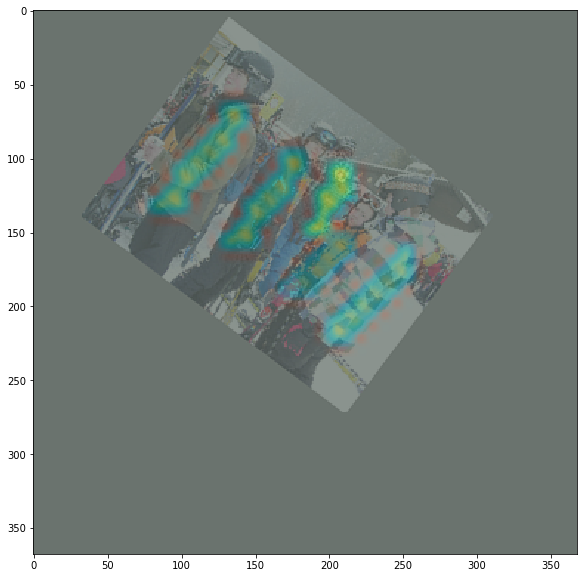

In [7]:
paf_shown_1 = cv2.resize(paf[:, :, 0], (368, 368), interpolation=cv2.INTER_CUBIC)
paf_shown_2 = cv2.resize(paf[:, :, 1], (368, 368), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)
plt.imshow(paf_shown_1, alpha=.5)
plt.imshow(paf_shown_2, alpha=.5)